<a href="https://colab.research.google.com/github/Ilian10Janopullo/Machine-Learning-Project/blob/main/Copy_of_UnejsiML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lasso Regression

In [ ]:
#  Lasso Regression
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import joblib

# Load data with explicit dtype specification
df = pd.read_csv('/content/processed_ev_data (1).csv', low_memory=False)

# Separate numeric and categorical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Electric Range (km)')
categorical_features = df.select_dtypes(include=['object', 'bool']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Full pipeline with Lasso
lasso_pipe = make_pipeline(
    preprocessor,
    Lasso(max_iter=10000, random_state=42)
)

# Train-test split
X = df.drop(columns=['Electric Range (km)'])
y = df['Electric Range (km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid
param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10],
    'lasso__selection': ['cyclic', 'random']
}

# Grid search
lasso_grid = GridSearchCV(
    lasso_pipe,
    param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1
)

lasso_grid.fit(X_train, y_train)

# Best model
best_lasso = lasso_grid.best_estimator_
print(f"\nBest parameters: {lasso_grid.best_params_}")

# Evaluation
y_pred = best_lasso.predict(X_test)

print("\nLasso Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} km")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} km")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

# Save model
joblib.dump(best_lasso, 'lasso_model.pkl')
print("\nModel saved as 'lasso_model.pkl'")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.465e+06, tolerance: 4.480e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.381e+06, tolerance: 4.457e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.433e+06, tolerance: 4.457e


Best parameters: {'lasso__alpha': 0.001, 'lasso__selection': 'random'}

Lasso Performance:
RMSE: 30.50 km
MAE: 17.73 km
R²: 0.9483

Model saved as 'lasso_model.pkl'


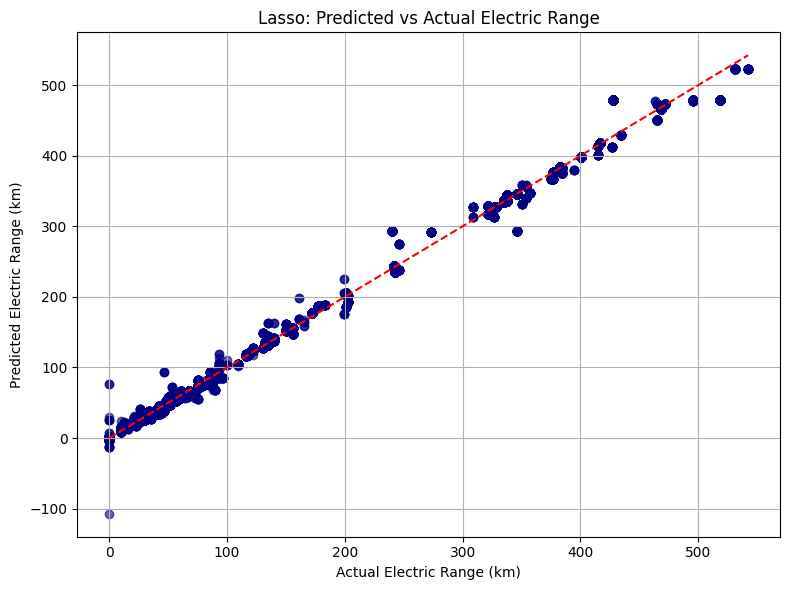

In [ ]:
# Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Electric Range (km)')
plt.ylabel('Predicted Electric Range (km)')
plt.title('Lasso: Predicted vs Actual Electric Range')
plt.grid(True)
plt.tight_layout()
plt.show()


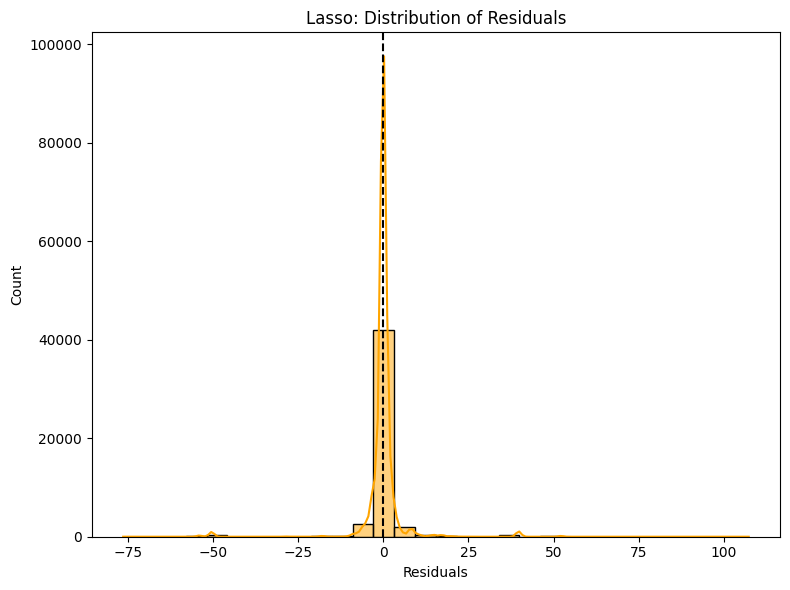

In [ ]:
import seaborn as sns

# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange', bins=30)
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Residuals')
plt.title('Lasso: Distribution of Residuals')
plt.tight_layout()
plt.show()


In [ ]:
# Cell 1 - Clean Installation (Updated for current Colab)
!pip uninstall -y numpy catboost  # Clean existing installations
!pip install numpy==1.26.4  # Newer version that works with current Colab
!pip install catboost==1.2.8  # Latest stable version
!pip install scikit-learn pandas matplotlib seaborn joblib

# Restart the runtime after installation
import os
os.kill(os.getpid(), 9)
# Cell 1 - Install Required Packages
!pip install catboost scikit-learn pandas numpy matplotlib --quiet
print("Packages installed successfully!")

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 64.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
import catboost
import sklearn
import numpy as np
print(f"CatBoost version: {catboost.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"NumPy version: {np.__version__}")

CatBoost version: 1.2.8
Scikit-learn version: 1.6.1
NumPy version: 1.26.4


## CatBoost

In [ ]:
import pandas as pd
import numpy as np
import os
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load and prepare data
data_path = '/content/processed_ev_data (1).csv'  # Update this path if needed
df = pd.read_csv(data_path, low_memory=False)

# Separate features and target
X = df.drop(columns=['Electric Range (km)'])
y = df['Electric Range (km)']

# Identify categorical features (object or bool types)
cat_features = list(X.select_dtypes(include=['object', 'bool']).columns)

# Handle missing values and ensure categorical columns are strings
for col in cat_features:
    X[col] = X[col].fillna('MISSING').astype(str)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost Regressor
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=50,
    cat_features=cat_features,
    task_type='CPU'
)

# Fit model with early stopping
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50,
    plot=True
)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("\nCatBoost Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} km")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} km")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

# Plot feature importance
importances = model.get_feature_importance(Pool(X_train, label=y_train, cat_features=cat_features))
feature_names = X.columns

# plt.figure(figsize=(12, 8))
# plt.barh(feature_names, importances)
# plt.xlabel('Importance')
# plt.title('Feature Importance')
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

# Save the trained model
model.save_model('catboost_model.cbm')


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 127.7244821	test: 128.3790476	best: 128.3790476 (0)	total: 46.1ms	remaining: 23s
50:	learn: 18.8253585	test: 18.5635125	best: 18.5635125 (50)	total: 1.5s	remaining: 13.2s
100:	learn: 11.7650846	test: 11.6243346	best: 11.6243346 (100)	total: 2.84s	remaining: 11.2s
150:	learn: 9.6571732	test: 9.6483624	best: 9.6483624 (150)	total: 4.11s	remaining: 9.51s
200:	learn: 8.4926659	test: 8.5386072	best: 8.5386072 (200)	total: 5.43s	remaining: 8.08s
250:	learn: 7.6360775	test: 7.7278782	best: 7.7278782 (250)	total: 6.8s	remaining: 6.74s
300:	learn: 7.1295483	test: 7.2479259	best: 7.2479259 (300)	total: 8.11s	remaining: 5.36s
350:	learn: 6.8270861	test: 6.9608250	best: 6.9608250 (350)	total: 10.8s	remaining: 4.6s
400:	learn: 6.6066415	test: 6.7510614	best: 6.7510614 (400)	total: 12.9s	remaining: 3.17s
450:	learn: 6.4367297	test: 6.5960067	best: 6.5960067 (450)	total: 14.4s	remaining: 1.56s
499:	learn: 6.2973125	test: 6.4594772	best: 6.4594772 (499)	total: 15.7s	remaining: 0us

bestTest 

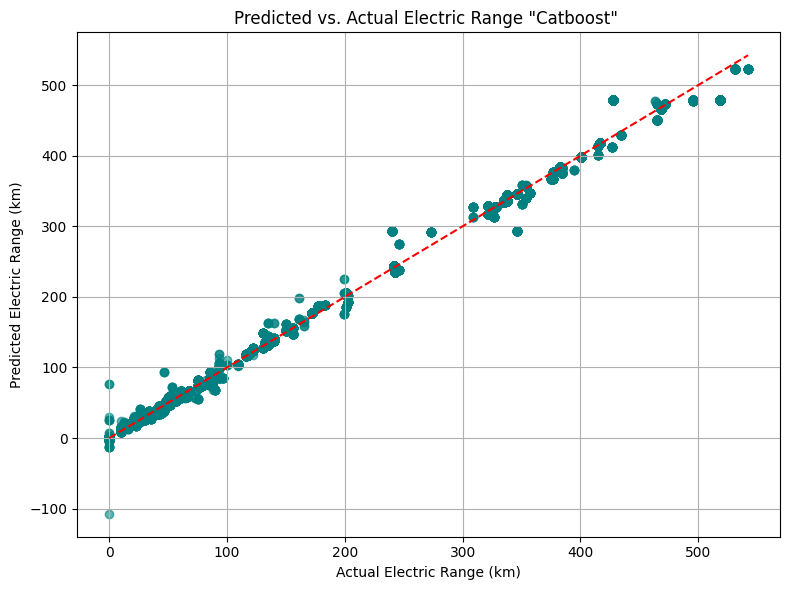

In [ ]:
# Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect line
plt.xlabel('Actual Electric Range (km)')
plt.ylabel('Predicted Electric Range (km)')
plt.title('Predicted vs. Actual Electric Range "Catboost" ')
plt.grid(True)
plt.tight_layout()
plt.show()


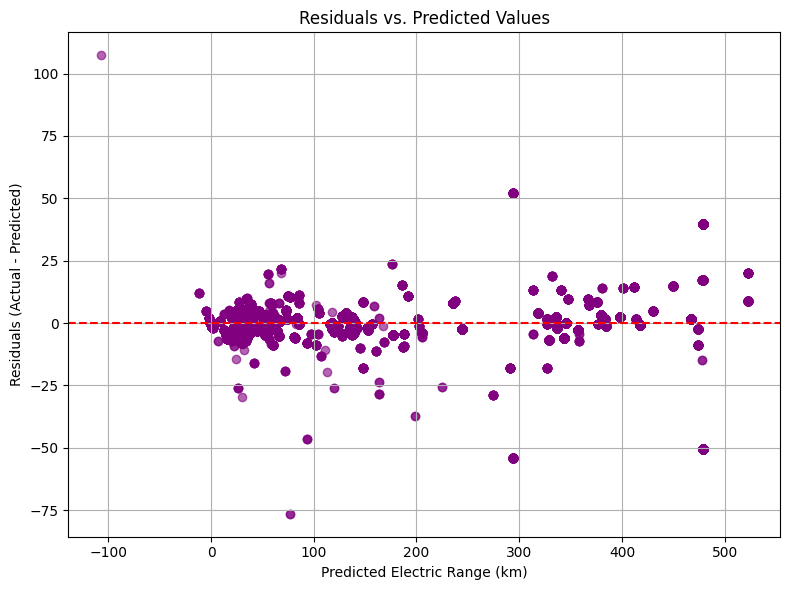

In [ ]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Electric Range (km)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()


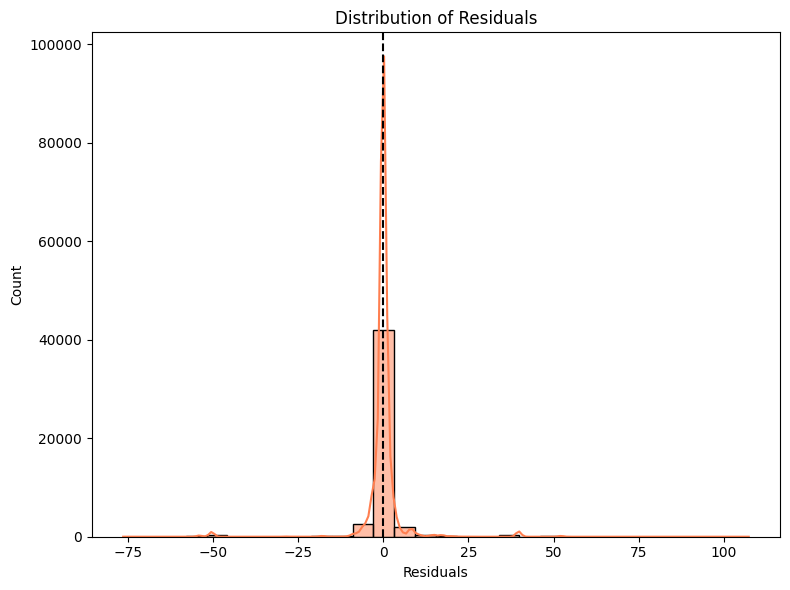

In [ ]:
# Histogram of Residuals
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='coral', bins=30)
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()
